# OOI cgsn-parsers --  metbk
While from this example it appears that much of this machinery could be replaced with a simpler approach using pandas `read_csv` and a mapper definition of columns: variable name, column index, and units string, other raw files are hex or binary

In [1]:
%matplotlib inline
import requests
import pandas as pd
import os
import sys
from cgsn_parsers.parsers.parse_metbk import Parser as Parser_metbk

In [2]:
# add cgsn-parsers tools to the path (no package yet)
path = os.path.abspath('../')
sys.path.append(path)

In [3]:
#Coastal Endurance - WA Shelf Surface Piercing Profiler Mooring
baseurl = "https://rawdata.oceanobservatories.org/files/CE07SHSM/D00003/cg_data/dcl11/metbk/"
fname = "20160522.metbk.log"

In [4]:
# Coastal Pioneer - Central Surface Mooring
baseurl = "https://rawdata.oceanobservatories.org/files/CP01CNSM/D00006/cg_data/dcl11/metbk1/"
fname = "20170112.metbk1.log"

In [5]:
# initialize the Parser object for METBK
metbk = Parser_metbk(baseurl + fname)

In [6]:
r = requests.get(metbk.infile, verify=True) # use verify=False for expired certificate
metbk.raw = r.content.splitlines()

In [7]:
len(metbk.raw), metbk.raw[-5:]

(1440,
 ['2017/01/12 23:55:21.296 1019.84  80.627  14.806  347.9   15.66  11.852  3.9158    0.4    9.15    2.25  3.9158 12.50',
  '2017/01/12 23:56:25.575 1019.43  80.553  14.852  349.2   15.69  11.857  3.9168    0.5    7.89    7.57  3.9168 12.50',
  '2017/01/12 23:57:29.900 1019.77  80.980  14.768  349.2   15.69  11.860  3.9173    0.5    8.25    4.53  3.9173 12.50',
  '2017/01/12 23:58:34.245 1019.43  81.105  14.799  349.2   15.69  11.847  3.9148    0.4    7.69    4.22  3.9148 12.50',
  '2017/01/12 23:59:38.785 1019.36  81.487  14.768  351.1   15.69  11.840  3.9138    0.4    7.56    4.06  3.9138 12.50'])

In [8]:
metbk.parse_data()

In [9]:
metbk.data.keys()

['longwave_irradiance',
 'eastward_wind_velocity',
 'sea_surface_conductivity',
 'dcl_date_time_string',
 'shortwave_irradiance',
 'time',
 'northward_wind_velocity',
 'precipitation_level',
 'relative_humidity',
 'air_temperature',
 'sea_surface_temperature',
 'barometric_pressure']

In [11]:
df = pd.DataFrame(metbk.data)
df['dt_utc'] = pd.to_datetime(df.dcl_date_time_string, utc=True)
df.set_index('dt_utc', drop=False, inplace=True)

In [12]:
# Later, can drop time, dcl_date_time_string, and maybe dt_utc (not the index)
df.shape, df.columns

((1440, 13),
 Index([u'air_temperature', u'barometric_pressure', u'dcl_date_time_string',
        u'eastward_wind_velocity', u'longwave_irradiance',
        u'northward_wind_velocity', u'precipitation_level',
        u'relative_humidity', u'sea_surface_conductivity',
        u'sea_surface_temperature', u'shortwave_irradiance', u'time',
        u'dt_utc'],
       dtype='object'))

In [13]:
df.dtypes

air_temperature                    float64
barometric_pressure                float64
dcl_date_time_string                object
eastward_wind_velocity             float64
longwave_irradiance                float64
northward_wind_velocity            float64
precipitation_level                float64
relative_humidity                  float64
sea_surface_conductivity           float64
sea_surface_temperature            float64
shortwave_irradiance               float64
time                               float64
dt_utc                      datetime64[ns]
dtype: object

In [14]:
df.tail(10)

,air_temperature,barometric_pressure,dcl_date_time_string,eastward_wind_velocity,longwave_irradiance,northward_wind_velocity,precipitation_level,relative_humidity,sea_surface_conductivity,sea_surface_temperature,shortwave_irradiance,time,dt_utc
dt_utc,,,,,,,,,,,,,
2017-01-12 23:50:30.362,14.875,1019.70,2017/01/12 23:50:30.362,8.99,344.7,5.25,15.68,80.250,3.9318,11.952,0.3,1.484265e+09,2017-01-12 23:50:30.362
2017-01-12 23:51:34.596,14.859,1019.70,2017/01/12 23:51:34.596,7.31,343.8,4.22,15.68,80.715,3.9295,11.937,0.3,1.484265e+09,2017-01-12 23:51:34.596
2017-01-12 23:52:40.291,14.799,1019.63,2017/01/12 23:52:40.291,8.30,344.4,5.31,15.67,80.943,3.9262,11.920,0.2,1.484265e+09,2017-01-12 23:52:40.291
2017-01-12 23:53:12.544,14.829,1019.63,2017/01/12 23:53:12.544,9.87,345.3,4.45,15.67,81.032,3.9195,11.880,0.2,1.484265e+09,2017-01-12 23:53:12.544
2017-01-12 23:54:16.781,14.799,1019.98,2017/01/12 23:54:16.781,10.01,346.8,5.93,15.64,80.987,3.9164,11.858,0.3,1.484265e+09,2017-01-12 23:54:16.781
2017-01-12 23:55:21.296,14.806,1019.84,2017/01/12 23:55:21.296,9.15,347.9,2.25,15.66,80.627,3.9158,11.852,0.4,1.484265e+09,2017-01-12 23:55:21.296
2017-01-12 23:56:25.575,14.852,1019.43,2017/01/12 23:56:25.575,7.89,349.2,7.57,15.69,80.553,3.9168,11.857,0.5,1.484265e+09,2017-01-12 23:56:25.575
2017-01-12 23:57:29.900,14.768,1019.77,2017/01/12 23:57:29.900,8.25,349.2,4.53,15.69,80.980,3.9173,11.860,0.5,1.484265e+09,2017-01-12 23:57:29.900
2017-01-12 23:58:34.245,14.799,1019.43,2017/01/12 23:58:34.245,7.69,349.2,4.22,15.69,81.105,3.9148,11.847,0.4,1.484266e+09,2017-01-12 23:58:34.245


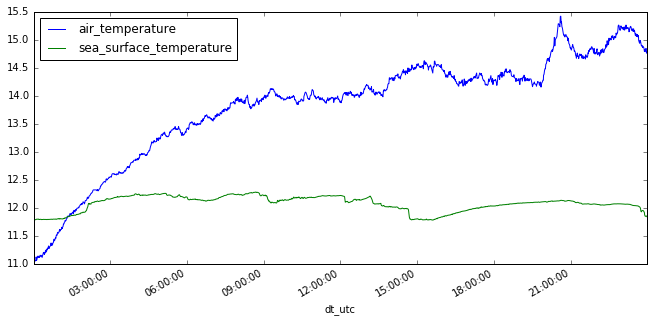

In [15]:
df[['air_temperature', 'sea_surface_temperature']].plot(figsize=(11,5));

In [ ]:
df['sea_surface_conductivity'].plot(figsize=(11,5));